In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, r2_score
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import xgboost as xgb
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
from preprocess import AmazonReviews

In [3]:
data = AmazonReviews(max_words=1500, is_regression=True)

In [4]:
data.X.shape

(292026, 1504)

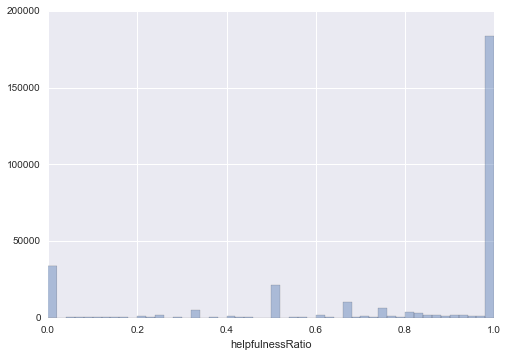

In [9]:
# Distribution of helpfulness ratios
sb.distplot(data.Y, kde=False)

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(data.X, data.Y, train_size=0.80)

In [7]:
model = RandomForestRegressor(n_estimators=10)

In [8]:
model.fit(xtrain, ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [9]:
ypred = model.predict(xtest)

In [10]:
r2_score(ytest, ypred)

0.41644318651914647

In [10]:
# Change task to classification
data.regression = False

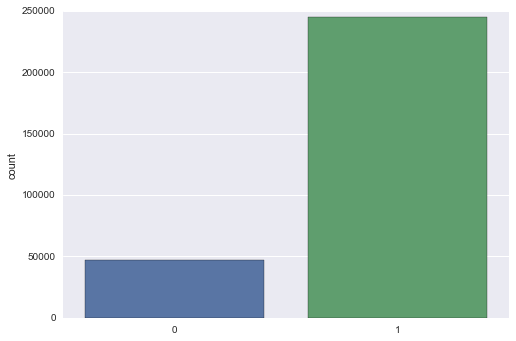

In [11]:
# Distribution of helpfulness "classes"
sb.countplot(x=data.Y)

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(data.X, data.Y, train_size=0.80, stratify=data.Y)

In [46]:
model3 = RandomForestClassifier(n_estimators=25, oob_score=True, verbose=2)

In [47]:
model3.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=True, random_state=None, verbose=2, warm_start=False)

In [48]:
ypred3 = model3.predict(xtest)

In [49]:
roc_auc_score(ytest, ypred3)

0.71288550081410396

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, ypred3)

array([[ 4080,  5368],
       [  297, 48661]])

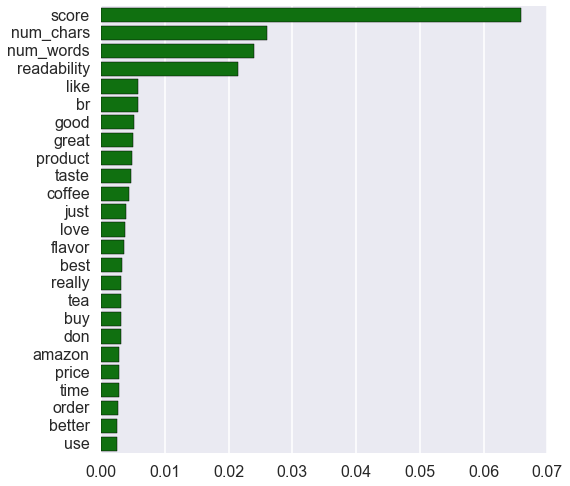

In [51]:
# Feature importances
sb.set_context('poster', rc={'figure.figsize':(8, 8)})
importances = sorted(zip(data.X.columns, np.abs(model3.feature_importances_)), key=lambda x: x[1], reverse=True)
features, values = zip(*importances[:25])
sb.barplot(x=values, y=features, orient='h', color='g')

In [75]:
results = pd.DataFrame(np.vstack((ytest, ypred3)).T, columns=['true', 'pred'])
false_neg = results[(results.true == 1) & (results.pred == 0)]
false_pos = results[(results.true == 0) & (results.pred == 1)]

In [84]:
xtest.reset_index().ix[false_neg.index].describe()

,index,score,num_words,num_chars,readability,00,10,100,11,12,...,years,yeast,yellow,yes,yogurt,young,yum,yummy,zero,zico
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,...,297.000000,297.0,297.000000,297.000000,297.0,297.000000,297.0,297.000000,297.000000,297.0
mean,292073.319865,1.649832,62.784512,288.585859,22.746768,0.010101,0.040404,0.040404,0.020202,0.040404,...,0.037037,0.0,0.006734,0.010101,0.0,0.003367,0.0,0.003367,0.013468,0.0
std,153958.818540,1.035816,111.999852,541.585953,36.519269,0.100164,0.293598,0.383420,0.140928,0.336492,...,0.206258,0.0,0.116052,0.100164,0.0,0.058026,0.0,0.058026,0.115462,0.0
min,3887.000000,1.000000,10.000000,36.000000,-8.430000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
25%,159121.000000,1.000000,22.000000,96.000000,3.570000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
50%,302561.000000,1.000000,29.000000,124.000000,11.570000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
75%,421419.000000,2.000000,48.000000,214.000000,32.570000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
max,566353.000000,5.000000,932.000000,4764.000000,379.070000,1.000000,4.000000,6.000000,1.000000,5.000000,...,2.000000,0.0,2.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,0.0


In [85]:
xtest.reset_index().ix[false_pos.index].describe()

,index,score,num_words,num_chars,readability,00,10,100,11,12,...,years,yeast,yellow,yes,yogurt,young,yum,yummy,zero,zico
count,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,...,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000
mean,277953.462183,3.082526,78.164680,348.365686,24.894702,0.009687,0.033718,0.021610,0.009687,0.037072,...,0.038189,0.005402,0.007824,0.015089,0.008197,0.002794,0.003726,0.012668,0.005030,0.001677
std,167388.770459,1.622832,79.873239,375.066447,32.124835,0.105288,0.199168,0.181855,0.115419,0.229070,...,0.209327,0.111600,0.112289,0.137708,0.127786,0.059434,0.066767,0.115130,0.070749,0.052840
min,67.000000,1.000000,10.000000,43.000000,-13.930000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,130699.250000,1.000000,32.000000,140.000000,7.570000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,271101.500000,3.000000,54.000000,236.000000,17.070000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,429261.500000,5.000000,94.000000,411.250000,32.070000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,568346.000000,5.000000,1535.000000,8579.000000,523.070000,2.000000,4.000000,5.000000,4.000000,4.000000,...,3.000000,4.000000,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000,2.000000
